In [53]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [58]:

# Load the dataset
df = pd.read_csv('Phishing_sample_datanew.csv')

In [59]:
df.info()
print("\nPrepared Dataset:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  1000 non-null   object 
 1   length_url           1000 non-null   int64  
 2   google_index         1000 non-null   int64  
 3   nb_hyperlinks        1000 non-null   int64  
 4   nb_subdomains        1000 non-null   int64  
 5   domain_age           1000 non-null   int64  
 6   length_words_raw     1000 non-null   int64  
 7   char_repeat          1000 non-null   int64  
 8   ratio_extHyperlinks  1000 non-null   float64
 9   status               1000 non-null   object 
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB

Prepared Dataset:
                                                 url  length_url  \
0                https://www.rga.com/about/workplace          35   
1                             http://starasia.com.hk          22   
2       

In [60]:
X = df.drop(columns=['url', 'status', 'domain_age', 'char_repeat'])  # Drop non-feature columns
Y = df['status']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [62]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [63]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [64]:
y_pred = pipeline.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("\nPipeline Accuracy:", accuracy)
print(f'Pipeline Accuracy: {accuracy * 100:.2f}%')


Pipeline Accuracy: 0.8933333333333333
Pipeline Accuracy: 89.33%


In [66]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  legitimate       0.92      0.87      0.90       159
    phishing       0.87      0.91      0.89       141

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



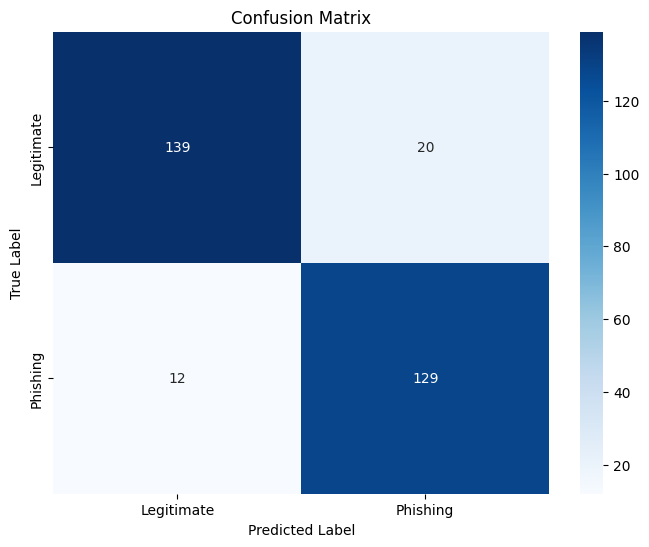

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [68]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 50],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8]
}



In [69]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 50],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10, 20],
                         'classifier__n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [70]:
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)



Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}
Best Cross-Validated Accuracy: 0.8942857142857144


In [71]:
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", accuracy_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned * 100:.2f}%')


Tuned Model Accuracy: 0.8933333333333333
Tuned Model Accuracy: 89.33%


In [72]:
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))



Classification Report (Tuned Model):
              precision    recall  f1-score   support

  legitimate       0.92      0.88      0.90       159
    phishing       0.87      0.91      0.89       141

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



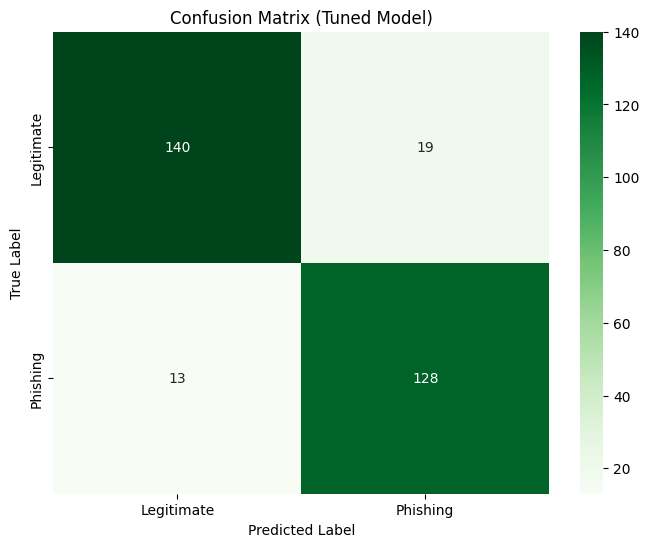

In [73]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Greens", xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix (Tuned Model)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()



In [74]:
import pickle

In [75]:
# Save the tuned model using pickle
with open('tuned_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

In [76]:
with open('tuned_model.pkl', 'wb') as file:  # Using pickle
    pickle.dump(grid_search.best_estimator_, file)

In [77]:
with open('tuned_model.pkl', 'rb') as file:
    tuned_model = pickle.load(file)